In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%%time
breakfast=pd.ExcelFile('Breakfast_at_the_Frat.xlsx')

Wall time: 1min 50s


In [3]:
# reading all sheet
stores=breakfast.parse(sheet_name=1,header=1,usecols=range(9))
products=breakfast.parse(sheet_name=2,header=1, usecols=range(6))
transaction=breakfast.parse(sheet_name=3,header=1,usecols=range(12))

## Products sheet

In [42]:
products.head(3)

,UPC,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE
0,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
1,1111009497,PL PRETZEL STICKS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
2,1111009507,PL TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ


In [29]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
UPC             58 non-null int64
DESCRIPTION     58 non-null object
MANUFACTURER    58 non-null object
CATEGORY        58 non-null object
SUB_CATEGORY    58 non-null object
PRODUCT_SIZE    58 non-null object
dtypes: int64(1), object(5)
memory usage: 2.8+ KB


In [84]:
products.UPC.nunique(), products.columns

(58, Index(['UPC', 'DESCRIPTION', 'MANUFACTURER', 'CATEGORY', 'SUB_CATEGORY',
        'PRODUCT_SIZE'],
       dtype='object'))

In [40]:
print( products.DESCRIPTION.unique().shape)
products.DESCRIPTION.unique()

(55,)


array(['PL MINI TWIST PRETZELS', 'PL PRETZEL STICKS', 'PL TWIST PRETZELS',
       'PL BL MINT ANTSPTC RINSE', 'PL ANTSPTC SPG MNT MTHWS',
       'PL HONEY NUT TOASTD OATS', 'PL RAISIN BRAN',
       'PL BT SZ FRSTD SHRD WHT', 'PL SR CRUST SUPRM PIZZA',
       'PL SR CRUST 3 MEAT PIZZA', 'PL SR CRUST PEPPRN PIZZA',
       'GM HONEY NUT CHEERIOS', 'GM CHEERIOS', 'NWMN OWN PEPPERONI PIZZA',
       'NWMN OWN 4 CHEESE PIZZA', 'NWMN OWN SUPREME PIZZA',
       'RLDGLD BRAIDED HONEY WHT', 'RLDGLD TINY TWISTS PRTZL',
       'RLDGLD PRETZEL STICKS', 'QKER LIFE ORIGINAL',
       'QKER CAP N CRUNCH BERRIES', 'QKER CAP N CRUNCH',
       'HMRN CLSC SAUSAGE PIZZA', 'HMRN CLSC SSG PEPP PIZZA',
       'HMRN CLSC CHS PIZZA', 'COLG SPEARMINT WISP',
       'CREST PH WHTG CLN MINT TP', 'SCOPE ORIG MINT MOUTHWASH',
       'CREST PH CLN MINT RINSE', 'KELL BITE SIZE MINI WHEAT',
       'KELL FROSTED FLAKES', 'KELL FROOT LOOPS',
       'ACT MINT A/CAV FLUOR RNS', 'ACT KIDS BBLGUM FLUOR RNS',
       'ACT RSTR CL

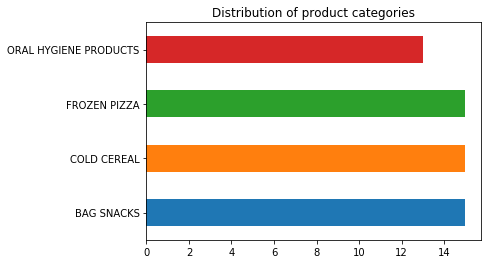

In [66]:
# There are four categories 
plt.title('Distribution of product categories')
products.CATEGORY.value_counts().plot(kind='barh')

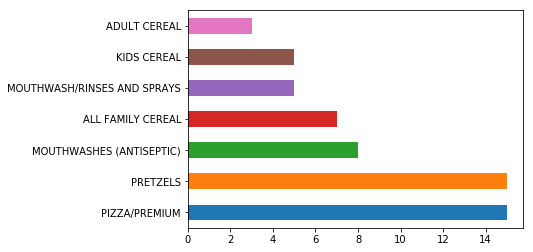

In [67]:
## Bag snacks and pizza premium have only one subcategory; 
## CEREALS contain  3 adult cereals, 5 kids cereal, 7 all family cereal
## Mouthwash contain 5 rinses and sprays and 8 antiseptic
products.SUB_CATEGORY.value_counts().plot(kind='barh')

In [94]:
products.groupby('CATEGORY')['MANUFACTURER'].value_counts()

CATEGORY               MANUFACTURER 
BAG SNACKS             FRITO LAY        3
                       MKSL             3
                       PRIVATE LABEL    3
                       SHULTZ           3
                       SNYDER S         3
COLD CEREAL            GENERAL MI       3
                       KELLOGG          3
                       POST FOODS       3
                       PRIVATE LABEL    3
                       QUAKER           3
FROZEN PIZZA           HOME RUN         3
                       KING             3
                       PRIVATE LABEL    3
                       TOMBSTONE        3
                       TONYS            3
ORAL HYGIENE PRODUCTS  CHATTEM          3
                       P & G            3
                       PRIVATE LABEL    3
                       WARNER           3
                       COLGATE          1
Name: MANUFACTURER, dtype: int64

## stores sheet

In [87]:
stores.columns

Index(['STORE_ID', 'STORE_NAME', 'ADDRESS_CITY_NAME',
       'ADDRESS_STATE_PROV_CODE', 'MSA_CODE', 'SEG_VALUE_NAME',
       'PARKING_SPACE_QTY', 'SALES_AREA_SIZE_NUM', 'AVG_WEEKLY_BASKETS'],
      dtype='object')

In [88]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
STORE_ID                   79 non-null int64
STORE_NAME                 79 non-null object
ADDRESS_CITY_NAME          79 non-null object
ADDRESS_STATE_PROV_CODE    79 non-null object
MSA_CODE                   79 non-null int64
SEG_VALUE_NAME             79 non-null object
PARKING_SPACE_QTY          27 non-null float64
SALES_AREA_SIZE_NUM        79 non-null int64
AVG_WEEKLY_BASKETS         79 non-null float64
dtypes: float64(2), int64(3), object(4)
memory usage: 5.6+ KB


In [170]:
# stores.STORE_ID.value_counts()

In [129]:
# stores.STORE_NAME.value_counts()

In [130]:
# stores.ADDRESS_CITY_NAME.value_counts()

In [90]:
stores.MSA_CODE.unique()

array([17140, 26420, 19100, 19380, 44220, 47540, 43300, 17780, 13140],
      dtype=int64)

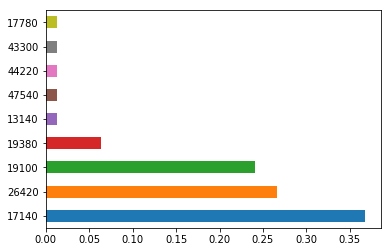

In [121]:
# around 95 % of all stores are located in four MSA 
(stores.MSA_CODE.value_counts()/stores.shape[0]).plot(kind='barh')

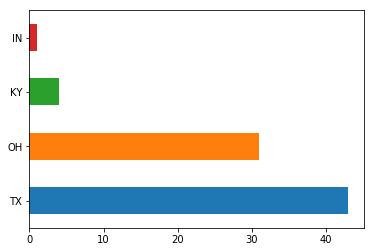

In [125]:
stores.ADDRESS_STATE_PROV_CODE.value_counts().plot(kind='barh')

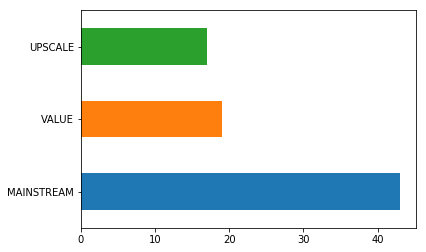

In [133]:
stores.SEG_VALUE_NAME.value_counts().plot(kind='barh')

In [138]:
stores[['PARKING_SPACE_QTY']].describe()

,PARKING_SPACE_QTY
count,27.000000
mean,480.518519
std,403.659641
min,17.000000
25%,282.000000
50%,351.000000
75%,488.500000
max,1859.000000


In [140]:
stores.SALES_AREA_SIZE_NUM.describe()

count       79.000000
mean     49145.164557
std      13512.452153
min      10788.000000
25%      43067.500000
50%      48594.000000
75%      55200.500000
max      86517.000000
Name: SALES_AREA_SIZE_NUM, dtype: float64

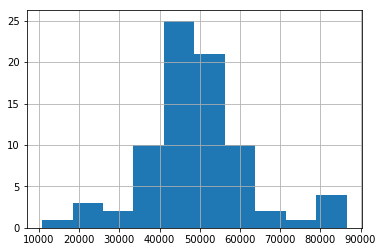

In [141]:
stores.SALES_AREA_SIZE_NUM.hist()

In [145]:
stores.AVG_WEEKLY_BASKETS.describe()

count       79.000000
mean     24146.806232
std       8720.396844
min      10434.705128
25%      17522.432692
50%      24567.750000
75%      29186.262821
max      54052.519231
Name: AVG_WEEKLY_BASKETS, dtype: float64

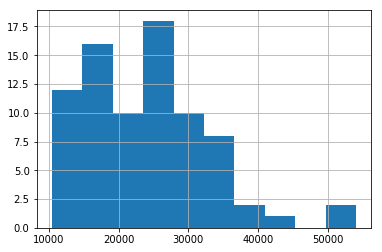

In [144]:
stores.AVG_WEEKLY_BASKETS.hist()

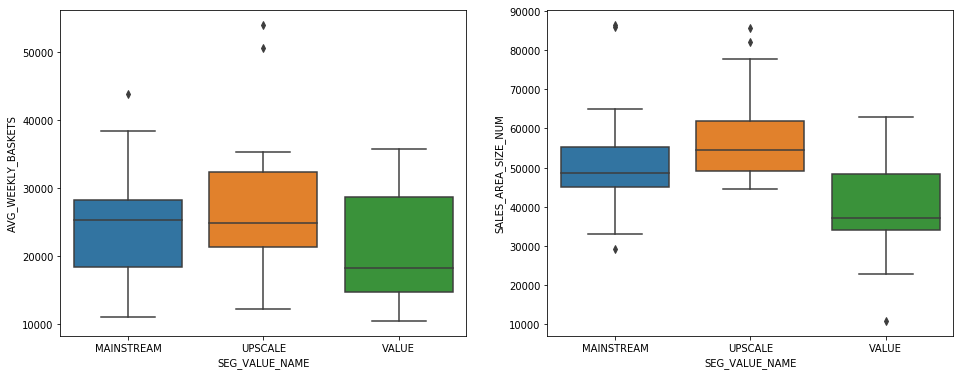

In [166]:
fig, axes=plt.subplots(1,2,figsize=(16,6))
sns.boxplot(x="SEG_VALUE_NAME", y="AVG_WEEKLY_BASKETS", data=stores, ax=axes[0])
sns.boxplot(x="SEG_VALUE_NAME", y="SALES_AREA_SIZE_NUM", data=stores, ax=axes[1])

## Transaction

In [168]:
# 524950 observation with 12 columns
transaction.shape
transaction.rename(columns={'STORE_NUM': 'STORE_ID'}, inplace=True)

(524950, 12)

## Combining stores and products dataframes with transaction dataframe

In [281]:
trans_new=transaction.merge(products, on='UPC').merge(stores, how='outer', on='STORE_ID')
trans_new.shape

(538643, 25)

In [340]:
trans_new.to_csv('trans_new.csv')

### Week_end_date

In [81]:
sortedWED=transaction.WEEK_END_DATE.value_counts(sort=False).reset_index().sort_values('index').set_index('index')

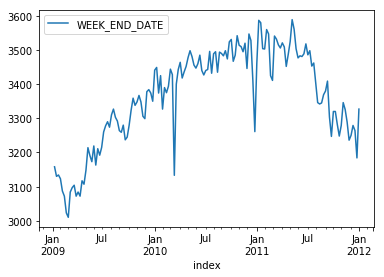

In [83]:
# number of transaction have been steadily increasing unit JAN 2011 but then become do decline
sortedWED.plot()

### Store number

In [70]:
plt.figure(figsize=(15,10))
# transaction.STORE_NUM.value_counts().plot(kind='barh')

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

### UPC

In [332]:
# there are 55 unique products 
print( transaction.UPC.nunique() )
plt.figure(figsize=(8,7))
# transaction.UPC.value_counts().plot(kind='barh')

55


<Figure size 576x504 with 0 Axes>

<Figure size 576x504 with 0 Axes>

### Units

568


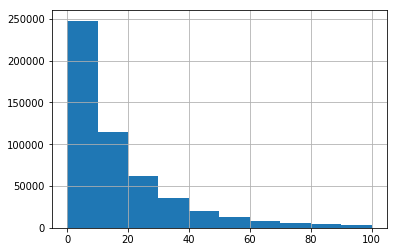

In [129]:
print( transaction.UNITS.nunique() )
transaction.UNITS.hist(range=(0,100))

### Visits

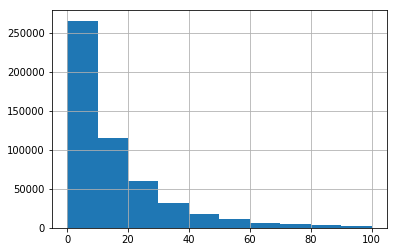

In [133]:
transaction.VISITS.hist(range=(0,100))

In [139]:
# units, visits and hhs have very high correlation
transaction[['UNITS','VISITS','HHS']].corr()

,UNITS,VISITS,HHS
UNITS,1.000000,0.986854,0.984971
VISITS,0.986854,1.000000,0.998642
HHS,0.984971,0.998642,1.000000


### Price and Base Price

Text(0.5, 1.0, 'Base Price')

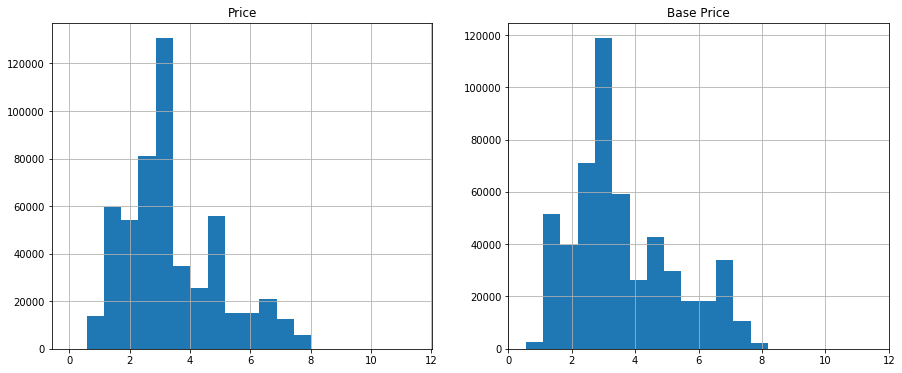

In [15]:
f, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,6))
transaction.PRICE.hist(bins=20,ax=ax1) 
ax1.set_title('Price')
transaction.BASE_PRICE.hist(bins=20, ax=ax2) 
ax2.set_title('Base Price')
# price distribution is kind of skewed

In [17]:
transaction[['PRICE','BASE_PRICE']].corr()

,PRICE,BASE_PRICE
PRICE,1.000000,0.953459
BASE_PRICE,0.953459,1.000000


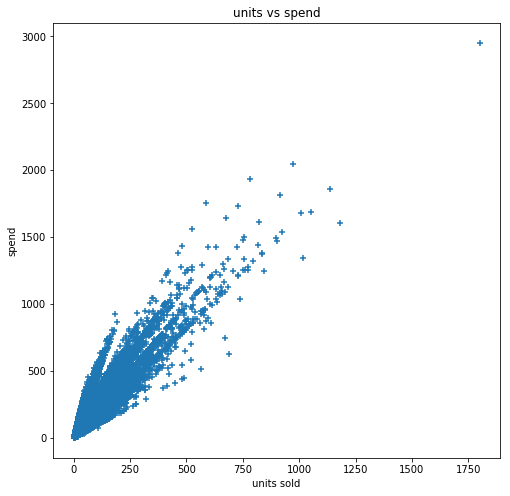

In [314]:
# plt.subplots(3,3)

fig=plt.figure(figsize=(8,8))
plt.scatter(transaction.UNITS, transaction.SPEND,marker='+')
plt.xlabel('units sold')
plt.ylabel('spend')
plt.title('units vs spend')
plt.show()